In [2]:
#python version
import sys
print(sys.version)

3.5.5 |Anaconda custom (64-bit)| (default, Apr  7 2018, 04:52:34) [MSC v.1900 64 bit (AMD64)]


In [3]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from svmutil import *

In [4]:
#Split the dataset
def split_DataSet(Dataset, size):
        msk = np.random.rand(len(Dataset))<size
        Data_train = Dataset[msk]
        Data_test = Dataset[~msk]
        return Data_train,Data_test
#Converting to libSVM format 
def convertTolibSVM(data, path):
    n = data.columns.size
    for i in range(n-1):
        data[i] = str(i+1)+':'+data[i].astype('str')
    col = data.columns.tolist()
    col = col[-1:] + col[:-1]
    new = data[col]
    new.to_csv(path+'_formated', sep=' ', header=None, index=None)

In [5]:
#Loading Spambase data
spam_data = pd.read_csv("spambase.data", header = None)
spam_data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [109]:
trainSet, testSet = split_DataSet(spam_data, 0.7)
trainSet.shape

(3222, 58)

In [113]:
#Converting to libSVM format
convertTolibSVM(trainSet, "libSVMProcessed/trainSet")
convertTolibSVM(testSet, "libSVMProcessed/testSet")

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [114]:
df3 = pd.read_csv("libSVMProcessed/trainSet_formated", header = None)
df3.size

3222

In [8]:
#Loading libSVM formatted data
y_TrainData, x_TrainData = svm_read_problem("libSVMProcessed/trainSet_formated")
y_TestData, x_TestData = svm_read_problem("libSVMProcessed/testSet_formated")
trainData  = svm_problem(y_TrainData, x_TrainData)

In [12]:
#Finding best model
bestModel = None
bestMSE = 0
acclist = []
mselist = []
reg = np.arange(0.5, 100, 0.5)
for regularization in reg:
    model = svm_train(trainData, svm_parameter('-c '+str(regularization)))
    labels, accuracy, values = svm_predict(y_TestData, x_TestData, model) 
    acclist.append(accuracy[0])
    mselist.append(accuracy[1])
    if bestModel == None or bestMSE > accuracy[1]: 
        bestModel = model
        bestMSE = accuracy[1]

Accuracy = 80.4206% (1109/1379) (classification)
Accuracy = 83.3938% (1150/1379) (classification)
Accuracy = 84.1914% (1161/1379) (classification)
Accuracy = 84.554% (1166/1379) (classification)
Accuracy = 84.9166% (1171/1379) (classification)
Accuracy = 85.2067% (1175/1379) (classification)
Accuracy = 85.3517% (1177/1379) (classification)
Accuracy = 85.4967% (1179/1379) (classification)
Accuracy = 85.3517% (1177/1379) (classification)
Accuracy = 85.3517% (1177/1379) (classification)
Accuracy = 85.4967% (1179/1379) (classification)
Accuracy = 85.6418% (1181/1379) (classification)
Accuracy = 85.5693% (1180/1379) (classification)
Accuracy = 85.6418% (1181/1379) (classification)
Accuracy = 85.7143% (1182/1379) (classification)
Accuracy = 85.7143% (1182/1379) (classification)
Accuracy = 85.7143% (1182/1379) (classification)
Accuracy = 85.6418% (1181/1379) (classification)
Accuracy = 85.4242% (1178/1379) (classification)
Accuracy = 85.3517% (1177/1379) (classification)
Accuracy = 85.2792% (

Accuracy = 84.4815% (1165/1379) (classification)
Accuracy = 84.4815% (1165/1379) (classification)
Accuracy = 84.4815% (1165/1379) (classification)
Accuracy = 84.4815% (1165/1379) (classification)
Accuracy = 84.4815% (1165/1379) (classification)
Accuracy = 84.4815% (1165/1379) (classification)
Accuracy = 84.554% (1166/1379) (classification)
Accuracy = 84.409% (1164/1379) (classification)
Accuracy = 84.409% (1164/1379) (classification)
Accuracy = 84.409% (1164/1379) (classification)
Accuracy = 84.409% (1164/1379) (classification)
Accuracy = 84.409% (1164/1379) (classification)
Accuracy = 84.409% (1164/1379) (classification)
Accuracy = 84.409% (1164/1379) (classification)
Accuracy = 84.409% (1164/1379) (classification)
Accuracy = 84.409% (1164/1379) (classification)
Accuracy = 84.409% (1164/1379) (classification)
Accuracy = 84.409% (1164/1379) (classification)
Accuracy = 84.409% (1164/1379) (classification)
Accuracy = 84.409% (1164/1379) (classification)
Accuracy = 84.409% (1164/1379) (cl

In [17]:
bestModel.param.C

7.5

In [20]:
acclist[np.where(reg==bestModel.param.C)[0][0]]

85.71428571428571

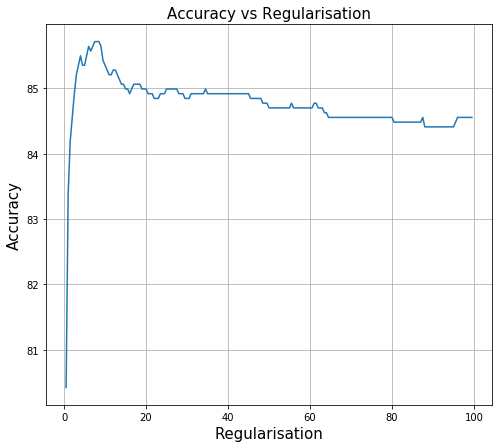

In [39]:
#Plotting Cost vs Accuracy
plt.figure(figsize=(8,7))
plt.plot(reg, acclist)
plt.grid()
plt.xlabel('Regularisation', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title("Accuracy vs Regularisation", fontsize = 15)
plt.show()

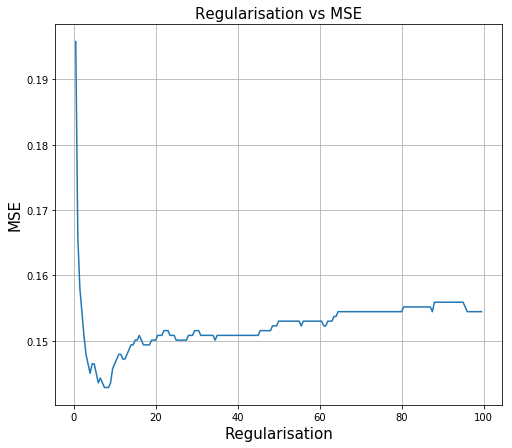

In [38]:
#Plotting Cost vs MSE
plt.figure(figsize=(8,7))
plt.plot(reg, mselist)
plt.grid()
plt.xlabel('Regularisation', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.title("Regularisation vs MSE", fontsize = 15)
plt.show()

In [27]:
#Prediction for best model
predictionLabels, predictionAccuracy, predictionValue = svm_predict(y_TestData,x_TestData ,bestModel)

Accuracy = 85.7143% (1182/1379) (classification)


In [47]:
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm

In [44]:
#Loading SMSSpamCollection dataset
sms_data = pd.read_csv('SMSSpamCollection', sep="\t", header=None, encoding='latin-1', names = ['Y', 'X'])
sms_data.head(5)

,Y,X
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


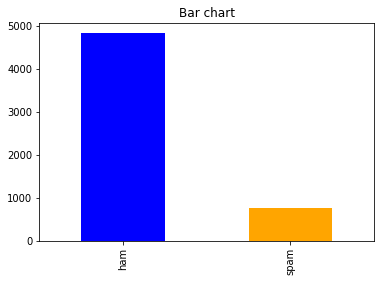

In [45]:
#Plotting Histogram of Spam and Non Spam messages
count_Class=pd.value_counts(sms_data["Y"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [51]:
#Frequent words in Spam/Non Spam messages
count1 = Counter(" ".join(sms_data[sms_data['Y']=='ham']["X"]).split()).most_common(50)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(sms_data[sms_data['Y']=='spam']["X"]).split()).most_common(50)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

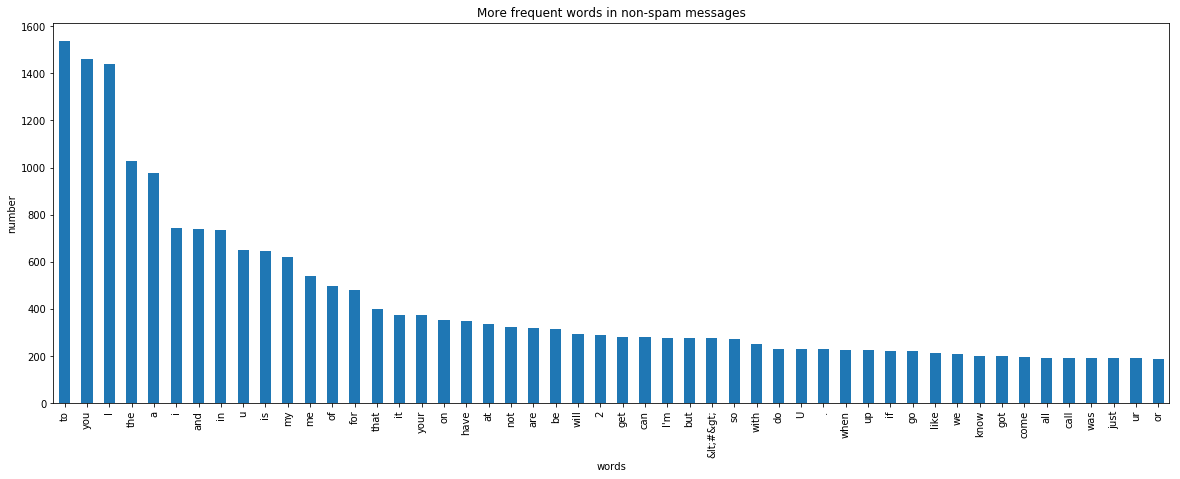

In [56]:
#Plots of more frequent words in non-spam messages
df1.plot.bar(legend = False,figsize=(20,7))
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

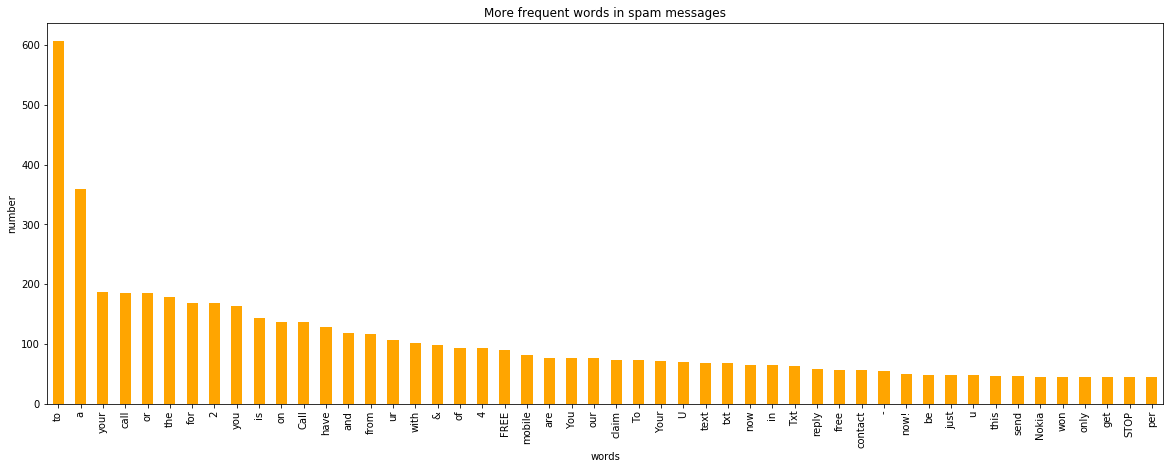

In [57]:
#Plots of more frequent words in Spam messages
df2.plot.bar(legend = False, color = 'orange',figsize=(20,7))
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [65]:
#Tf-idf and Stopword Removal
from sklearn.feature_extraction.text import TfidfVectorizer
f = TfidfVectorizer(stop_words = 'english')
X = f.fit_transform(sms_data["X"])

In [67]:
#Mapping 1 and 0 for Spam and Ham respectively
sms_data["Y"]=sms_data["Y"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, sms_data['Y'], test_size=0.3, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3900, 8480), (1672, 8480)]


In [99]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [100]:
#Gridsearch CV with 5 fold validation for SVC
model_SVC = GridSearchCV(SVC(), cv = 5, n_jobs = 3, param_grid = {"C" :np.arange(0.5, 10, 0.5), "kernel" : ["rbf", "linear", "poly"]},
             verbose = 1, refit = True)

model_SVC.fit(X_train, y_train)

Fitting 5 folds for each of 57 candidates, totalling 285 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   19.3s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.0min
[Parallel(n_jobs=3)]: Done 285 out of 285 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5,
       7. , 7.5, 8. , 8.5, 9. , 9.5]), 'kernel': ['rbf', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

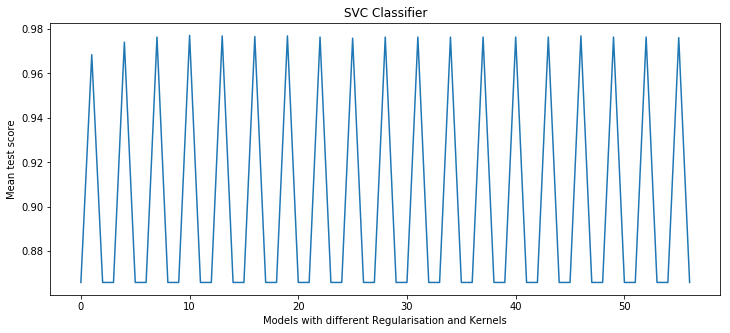

In [118]:
#Plots for SVC Classifier
plt.figure(figsize = (12, 5))
plt.title("SVC Classifier")
plt.plot(model_SVC.cv_results_["mean_test_score"])
plt.xlabel('Models with different Regularisation and Kernels', fontsize = 10)
plt.ylabel('Mean test score', fontsize = 10)
plt.show()

In [107]:
#Classification Report for SVC
pred_SVC = model_SVC.predict(X_test)
print(classification_report(y_test, pred_SVC, target_names=["ham", "spam"]))

             precision    recall  f1-score   support

        ham       0.99      1.00      0.99      1448
       spam       0.99      0.92      0.95       224

avg / total       0.99      0.99      0.99      1672



In [108]:
scores = pd.DataFrame(model_SVC.cv_results_)
scores.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.846961,0.197531,0.865897,0.865897,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",20,0.865557,0.865983,...,0.865385,0.866026,0.866496,0.865748,0.866496,0.865748,0.044151,0.017659,0.000492,0.000123
1,0.701866,0.129687,0.968462,0.984103,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",19,0.970551,0.983969,...,0.960256,0.987179,0.973042,0.981737,0.965340,0.983339,0.095777,0.009483,0.004981,0.001772
2,0.371246,0.080754,0.865897,0.865897,0.5,poly,"{'C': 0.5, 'kernel': 'poly'}",20,0.865557,0.865983,...,0.865385,0.866026,0.866496,0.865748,0.866496,0.865748,0.033116,0.004560,0.000492,0.000123
3,0.400664,0.099666,0.865897,0.865897,1,rbf,"{'C': 1.0, 'kernel': 'rbf'}",20,0.865557,0.865983,...,0.865385,0.866026,0.866496,0.865748,0.866496,0.865748,0.021299,0.014426,0.000492,0.000123
4,0.486122,0.093862,0.974103,0.996923,1,linear,"{'C': 1.0, 'kernel': 'linear'}",18,0.976953,0.997435,...,0.961538,0.997115,0.979461,0.995514,0.971759,0.997437,0.032422,0.006341,0.007000,0.000719


In [109]:
print("Best score " + str(model_SVC.best_params_))

Best score {'C': 2.0, 'kernel': 'linear'}


In [110]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

In [111]:
#Gridsearch CV with 5 fold validation for NB
model_NB = GridSearchCV(BernoulliNB(), cv = 5, n_jobs = 3, param_grid = {"alpha" :np.arange(0.1, 0.9, 0.05)},
             verbose = 1, refit = True)

model_NB.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=3)]: Done  80 out of  80 | elapsed:    5.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'alpha': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

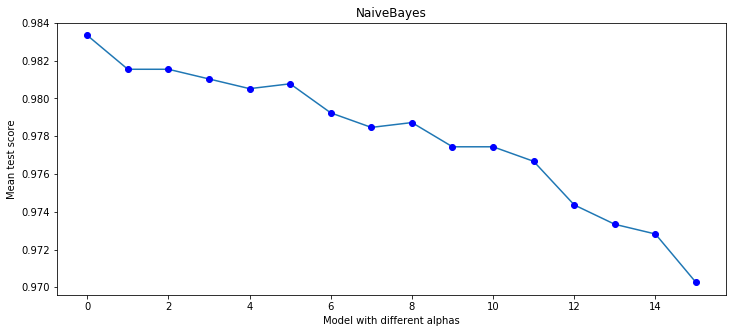

In [120]:
#Plots for NB Classifier
plt.figure(figsize = (12, 5))
plt.title("NaiveBayes")
plt.plot(model_NB.cv_results_["mean_test_score"])
plt.plot(model_NB.cv_results_["mean_test_score"], 'bo')
plt.xlabel('Model with different alphas', fontsize = 10)
plt.ylabel('Mean test score', fontsize = 10)
plt.show()

In [98]:
#Classification Report for NB
pred_NB = model_NB.predict(X_test)
print(classification_report(y_test, pred_NB, target_names=["ham", "spam"]))

             precision    recall  f1-score   support

        ham       0.99      1.00      0.99      1448
       spam       0.97      0.96      0.96       224

avg / total       0.99      0.99      0.99      1672



In [95]:
scores_NB = pd.DataFrame(model_NB.cv_results_)
scores_NB.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.011006,0.003803,0.983333,0.996410,0.1,{'alpha': 0.1},1,0.980794,0.997756,0.989757,...,0.978205,0.996154,0.987163,0.995835,0.980745,0.997116,0.001675,0.000981,0.004368,0.000916
1,0.012207,0.004005,0.981538,0.994936,0.15,{'alpha': 0.15000000000000002},2,0.979513,0.995511,0.985915,...,0.978205,0.994551,0.987163,0.995194,0.976893,0.995194,0.001167,0.000895,0.004184,0.000472
2,0.010810,0.004202,0.981538,0.994872,0.2,{'alpha': 0.20000000000000004},2,0.982074,0.995511,0.984635,...,0.976923,0.994551,0.987163,0.995194,0.976893,0.995194,0.001940,0.000748,0.004107,0.000574
3,0.011407,0.004003,0.981026,0.994231,0.25,{'alpha': 0.25000000000000006},4,0.983355,0.994550,0.982074,...,0.974359,0.994231,0.987163,0.994553,0.978177,0.994873,0.001961,0.000895,0.004398,0.000673
4,0.012207,0.004204,0.980513,0.993846,0.3,{'alpha': 0.30000000000000004},6,0.983355,0.994229,0.983355,...,0.973077,0.992949,0.984596,0.993912,0.978177,0.995194,0.001167,0.000749,0.004326,0.000846


In [92]:
print("Best score " + str(model_NB.best_params_))

Best score {'alpha': 0.1}
